                                                                           Day-1

#import Necessary library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#For Beautiful plot

In [ ]:
plt.style.use('bmh') #Bayesian Method for Hackers - BMH   #Best for: Technical presentations, academic work

#plt.style.use('seaborn-v0_8-bright')                     #Best for: Reports, publications, and storytelling dashboards

#plt.style.use('ggplot')                                  #Good for: general-purpose data visualization

#plt.style.use('fivethirtyeight')                         #Best for: Storytelling, media-style charts (e.g., FiveThirtyEight)

#plt.style.use('dark_background')                         #Best for: Presentations, dark-themed reports


#upload data set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML_Dataset /HOUSE PRICE /train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Small dataset: < 10,000 rows

Medium dataset: 10,000 – 1 million rows

Large dataset: > 1 million rows

Very large (Big Data): > 100 million rows

Few columns (< 10): Small

Moderate columns (10 - 100): Medium

Many columns (> 100): Large

Wide dataset (> 1,000 columns): High-dimensional data

dataset is > 1GB

# copy data in anothor veriable

In [ ]:
s=df.copy()

# Step-1: Mining information

## For Getting information

In [ ]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Describe()

In [ ]:
s.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#Step-2: Drop unnecessary columns and unimportant columns

## Drop haha columns

In [ ]:
df.drop(['Id'],axis=1,inplace=True)

# Removing the features which at 30% or less NaN values

In [ ]:
df2=df[[column for column in df if df[column].count()/len(df) >= 0.3]]

print("List of dropped columns:", end=' ')
for c in df.columns:
    if c not in df2.columns:
        print(c, end=', ')
print('\n')
s = df2

#Step-3: Handle duplicate value

In [ ]:
#Check duplicate value
s.duplicated().sum()

0

In [ ]:
#Handle duplicate value
s.drop_duplicates(inplace=True)

In [ ]:
df = df.drop_duplicates(keep='first')  # Keeps the first occurrence (default)
df = df.drop_duplicates(keep='last')   # Keeps the last occurrence
df = df.drop_duplicates(keep=False)    # Removes ALL duplicates

In [ ]:
#Remove Duplicates Based on Specific Columns
df = df.drop_duplicates(subset=['Column1', 'Column2'])

KeyError: Index(['Column1', 'Column2'], dtype='object')

#Step-4: Handle missing values

### check missing values

In [ ]:
s.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
s.isnull().mean()*100

,0
Id,0.000000
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,17.739726
LotArea,0.000000
...,...
MoSold,0.000000
YrSold,0.000000
SaleType,0.000000
SaleCondition,0.000000


In [ ]:
s.isnull().sum().sum()

7829

### Drop missing value below 5%

In [ ]:
cols = [x for x in s.columns if s[x].isnull().mean()<0.05 and s[x].isnull().mean()>0]
print(cols)
print(s[cols].isnull().sum().sum())

['MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical']
196


In [ ]:
#If i drop all the null values rows form this dataset (How much data i loss)
(len(s[cols].dropna())/len(s))*100

96.7123287671233

In [ ]:
new_df = df[cols].dropna()
print(df.shape)
print(new_df.shape)
print(len(df)-len(new_df))

(1460, 80)
(1412, 7)
48


In [ ]:
s=s.dropna(subset=cols)
s.shape

(1412, 81)

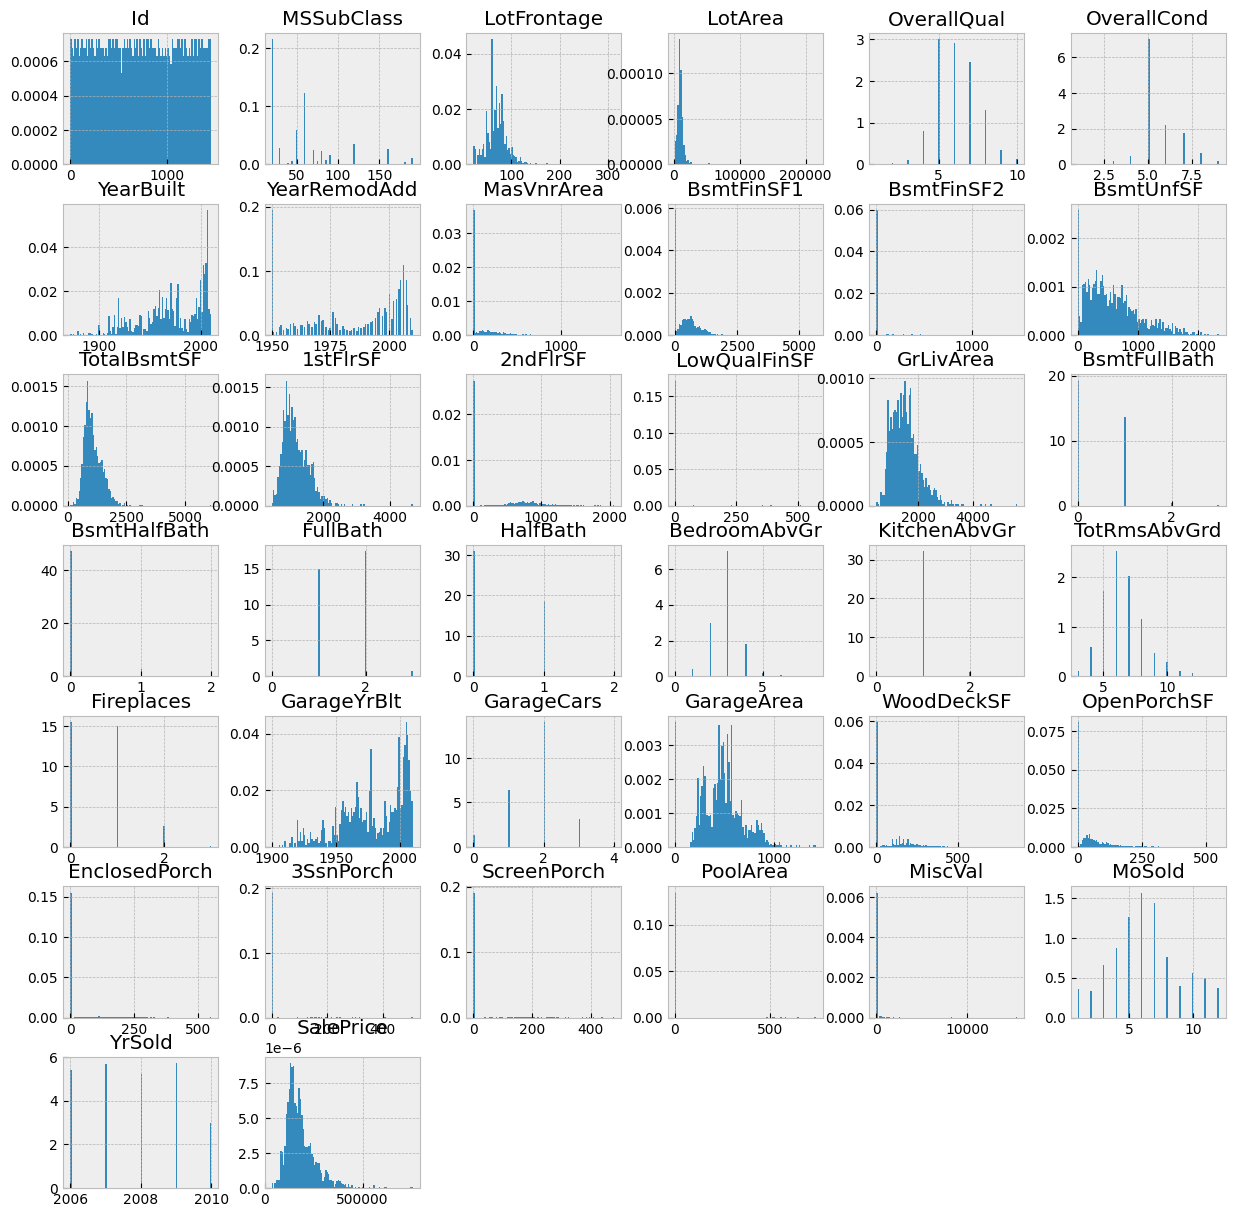

In [ ]:
#visualization-1
s.hist(bins=100,density=True,figsize=(15,15))
plt.show()

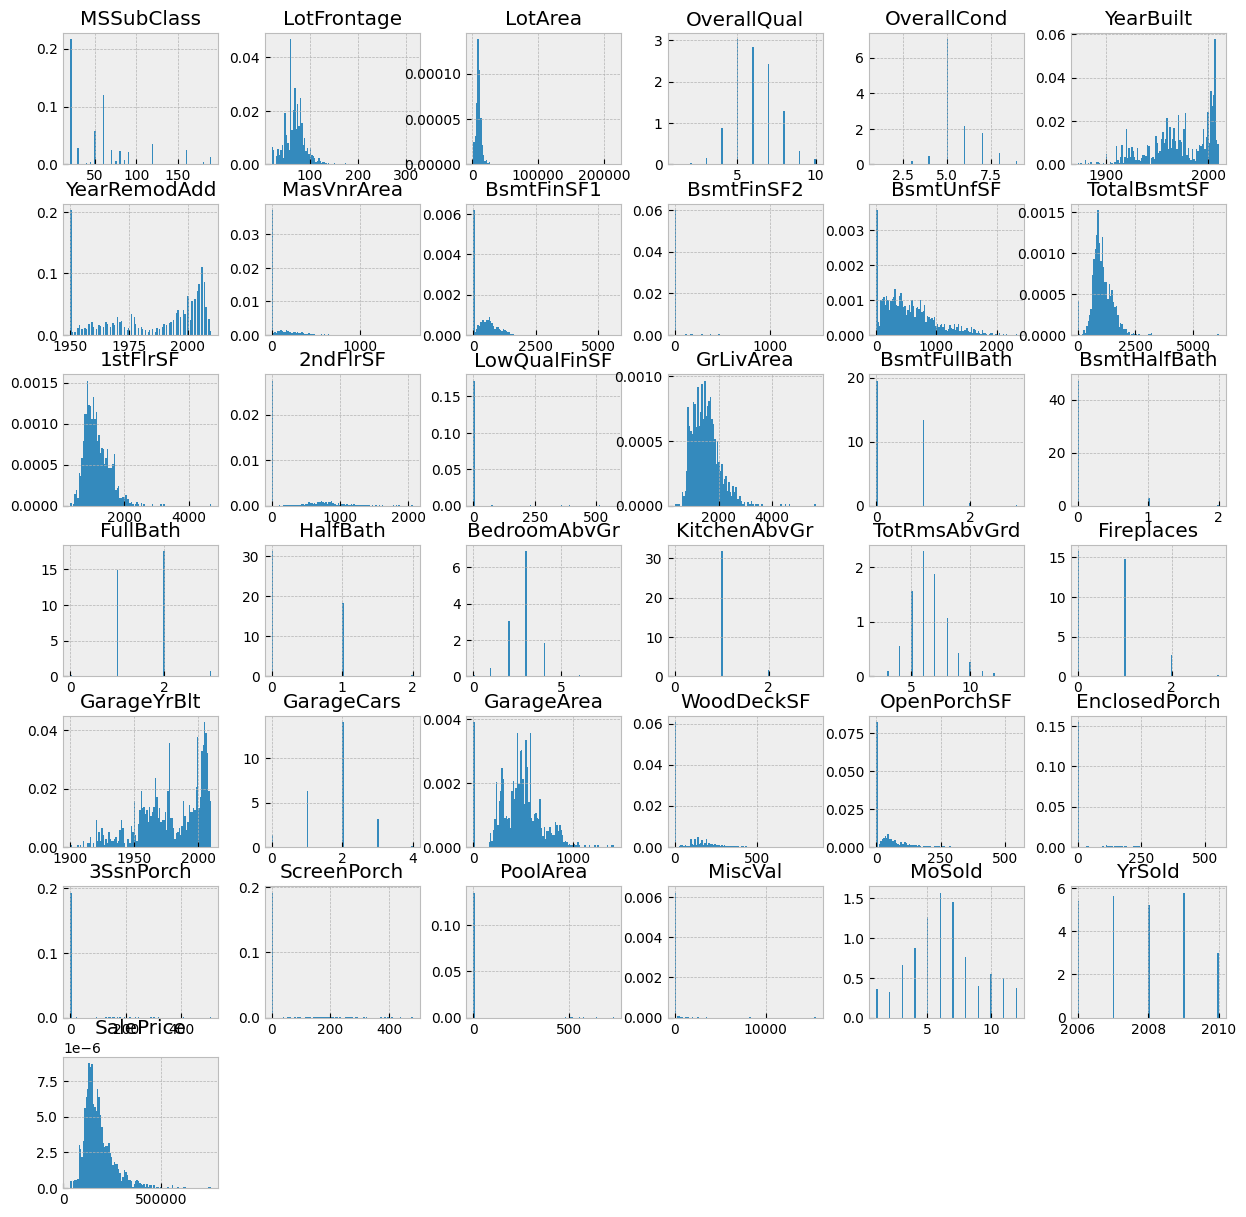

In [ ]:
#visualization-2
df.hist(bins=100,density=True,figsize=(15,15))
plt.show()

<Axes: >

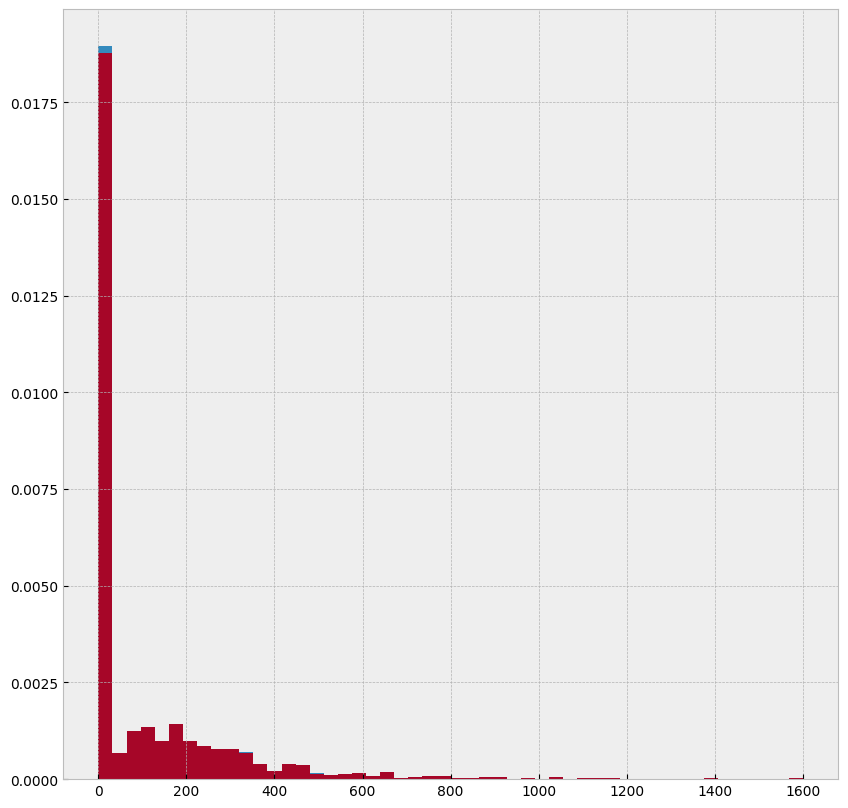

In [ ]:
#visualization-3
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

df['MasVnrArea'].hist(bins=50,density=True,ax=ax)
s['MasVnrArea'].hist(bins=50,density=True,ax=ax)

<Axes: ylabel='Density'>

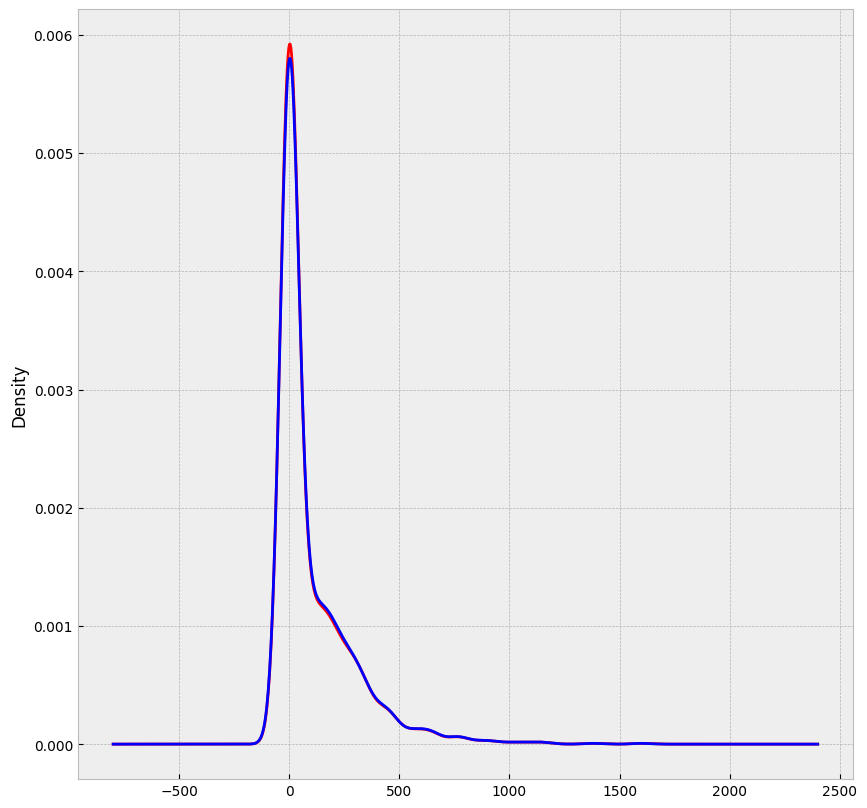

In [ ]:
#visualization-4
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

df['MasVnrArea'].plot.density(color='red')
new_df['MasVnrArea'].plot.density(color='blue')

###Handling missing data | Numerical Data | Simple Imputer

Mean & Median Imputaion
When use this-

i. Numerical Data

ii. data are random missing

iii. 5% data are missing

iV. When data is normally distributed(mean)

v. When data is right/left-skewed(median)

Drawback is

Change distribution shape

Make Outliers

Change Covariance and Correlation

### single column fill

In [ ]:
s_num['LotFrontage']

NameError: name 's_num' is not defined

In [ ]:
s['LotFrontage'].fillna(s['LotFrontage'].mean(),inplace=True)
s['LotFrontage'].mean()

In [ ]:
s1=df.copy()
s1['LotFrontage'].fillna(s1['LotFrontage'].median(),inplace=True)
s1['LotFrontage'].median()

In [ ]:
s['LotFrontage'].var() , s1['LotFrontage'].var() , df['LotFrontage'].var()

In [ ]:
#visualization
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

s['LotFrontage'].plot(kind='kde',ax=ax)
s1['LotFrontage'].plot(kind='kde',ax=ax)
df['LotFrontage'].plot(kind='kde',ax=ax)

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [ ]:
#vidualization:  check outlier
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
df['LotFrontage'].plot.box()
plt.title('df')

plt.subplot(1,3,2)
s['LotFrontage'].plot.box()
plt.title('s')

plt.subplot(1,3,3)
s1['LotFrontage'].plot.box()
plt.title('s1')
plt.show()

### Fill all the numerical columns in together

In [ ]:
s_num = s.select_dtypes(include=['float64','int64'])
s_num.shape,s.shape

In [ ]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan,strategy='mean')
si.fit(s_num)
s_num = pd.DataFrame(data=si.transform(s_num),columns=s_num.columns)
s_num.head()

In [ ]:
s_num.isnull().sum()

### Constant imputer

When use this-

i. Categorical Data and also numerical

ii. data are not random missing

iii. if data are less that time it works well

Drawback is

Pdf graph distort

variance

Change Covariance and Correlation

In [ ]:
#for single columns
s['Age'].fillna(35,inplace=True)

In [ ]:
#For all columns
s.fillna(35,inplace=True)
#Or
si=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=35)
si.fit(s)
s=pd.DataFrame(data=si.transform(s),columns=s.columns)

### Most frequent value Imputation

When use this-

i. Categorical Data

ii. data are not random missing

iii. if data are less that time it works well

Drawback is

Change data distribution

variance

Change Covariance and Correlation

In [ ]:
si=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
si.fit(s)
s=pd.DataFrame(data=si.transform(s),columns=s.columns)

### Random value imputer

When use this-

i. Categorical Data and numerical Data

ii. well for Linear and logistic regression

Drawback is

not Change data distribution
Memory heavy for deployment
Change Covariance and Correlation

In [ ]:
s['Age'][s['Age'].isnull()]=s['Age'].dropna().sample(s['Age'].isnull().sum()).values

In [ ]:
df_train['Age'].var(),df1['Age'].var()

In [ ]:
df_train.corr()

In [ ]:
df1.corr()

In [ ]:
#visualization-1
sns.distplot(s['Age'],label='Imputed',hist=False)
sns.distplot(df['Age'],label='Original',hist=False)
plt.legend()
plt.show()

In [ ]:
#visualization-2
df_train['Age'].plot.box()

In [ ]:
df1['Age'].plot.box()

Missing Indicator

1.Make a new column

2.You Can check some time its work

In [ ]:
from sklearn.impute import MissingIndicator
si=MissingIndicator(error_on_new=True,features='missing-only')
si.fit(s)

or

mi = MissingIndicator()
d['mising_age']=mi.fit_transform(d[['Age']])
d

### Automatically select value for imputation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Correct the typo in 'numetical_features'
numerical_features = ['Age', 'Fare']
# Ensure categorical_features are present
categorical_features = ['Sex', 'Embarked']

# Rest of your code...

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# ... (rest of the code)

param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')

# Ensure x_train contains the expected features after train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    df.drop('Survived', axis=1), df['Survived'], test_size=0.2, random_state=42
)

# Verify that the columns exist in x_train before fitting
print(x_train.columns)

grid_search.fit(x_train, y_train)
print(f'Best params:')
print(grid_search.best_params_)
print(f'Best score:{grid_search.best_score_:.3f}')

In [ ]:
import pandas as pd

cv_reslts = pd.DataFrame(grid_search.cv_results_)
cv_reslts = cv_reslts.sort_values(by='rank_test_score')
cv_reslts[['param_classifier__C', 'param_preprocessor__cat__imputer__strategy', 'param_preprocessor__num__imputer__strategy', 'mean_test_score', 'rank_test_score']]

### KNN imputer
! Whene use= (small or mediam) dataset why 'see disadvantage'

Advantage

i) More accurate

Disadvantage

i) if you deploy this things that time you need to (Upload your train set on the server) because its calculate all points distance.

ii) More calculation thats why take more time



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.impute import KNNImputer, SimpleImputer


In [ ]:
knn=KNNImputer(n_neighbors=3,weights='distance',add_indicator=True)
df['Age']=knn.fit_transform(df[['Age']])

### Multivariate Imputation by Chained Equations(MICE)
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

! Whene use= (small or mediam) dataset why 'see disadvantage'

Advantage

i) More accurate

Disadvantage

i) if you deploy this things that time you need to (Upload your train set on the server) because its calculate all points distance.

ii) More calculation thats why take more time

#Step-5: Handle Outlire

Outliers Detection:

[Visualization]

1.we can use "Scatterplot"

2.We also use "boxplot" -> best way(if dataset are small)

3.In "histogram", if data are left or right skewed that time lower part are outliers.

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))  # Adjust figure size
s.boxplot()
plt.xticks(rotation=90)  # Rotate column names
plt.show()

NameError: name 's' is not defined

<Figure size 1500x600 with 0 Axes>

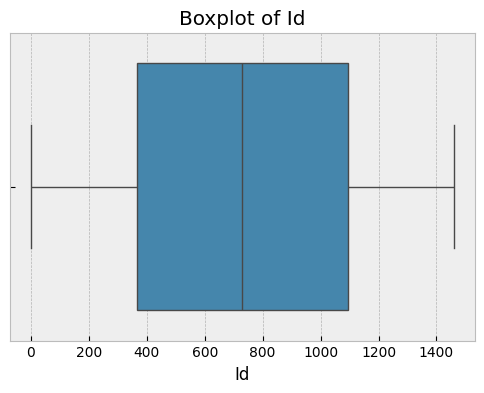

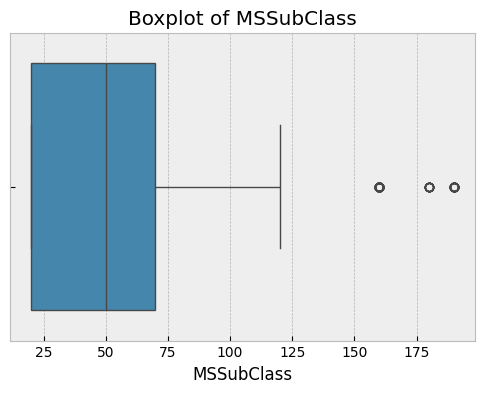

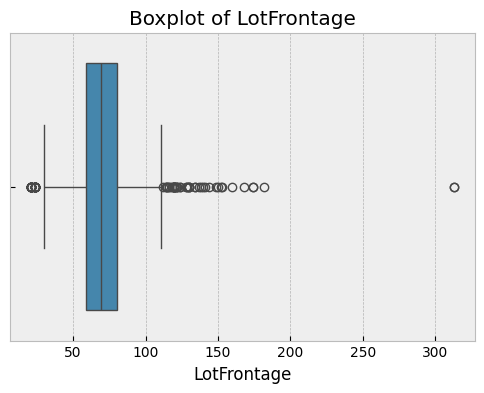

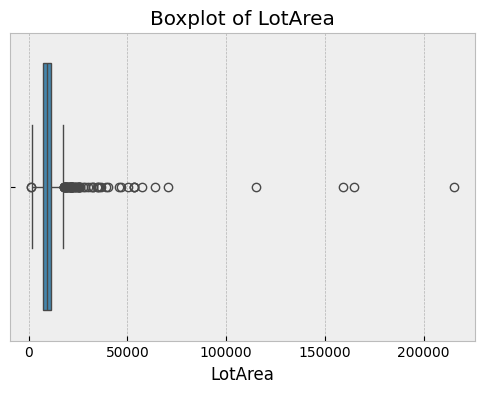

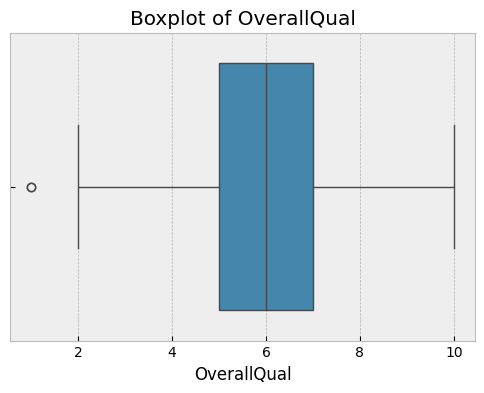

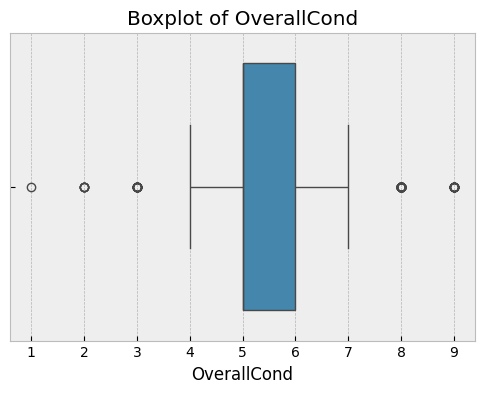

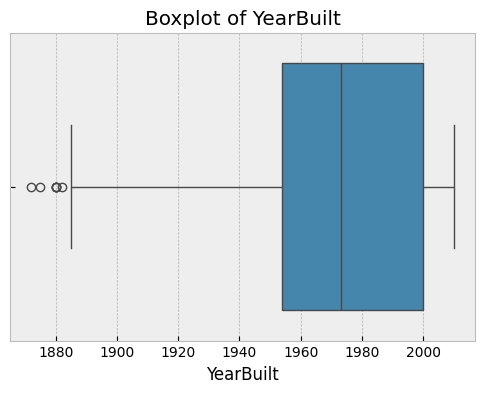

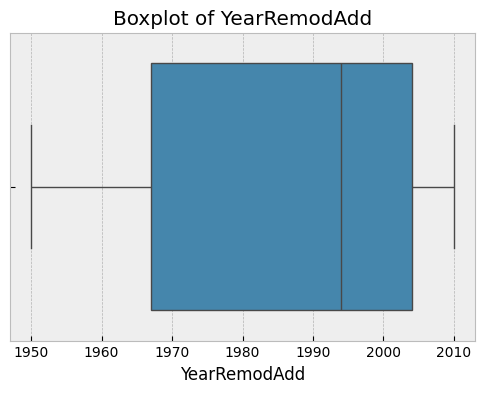

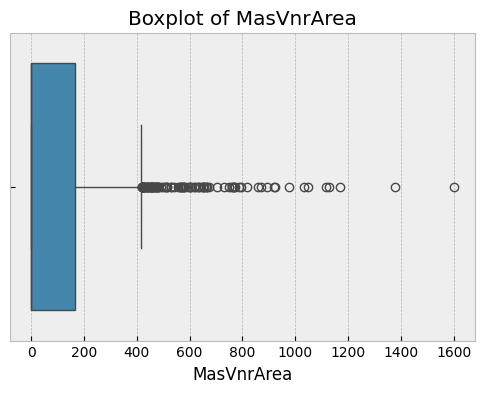

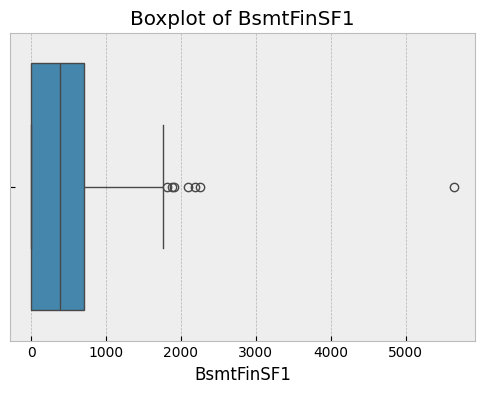

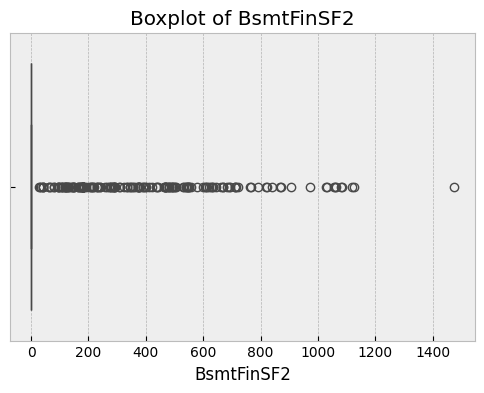

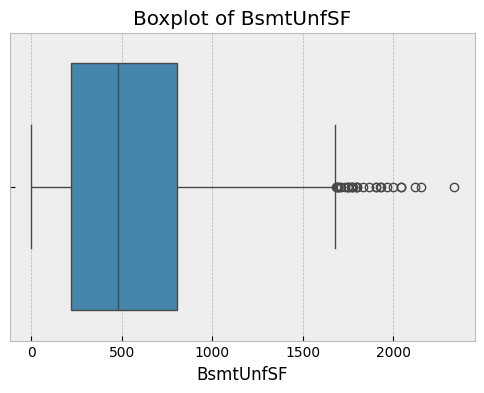

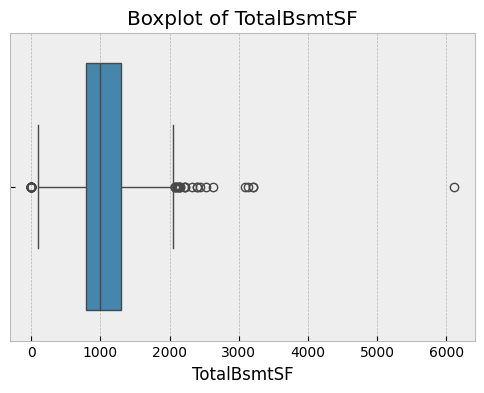

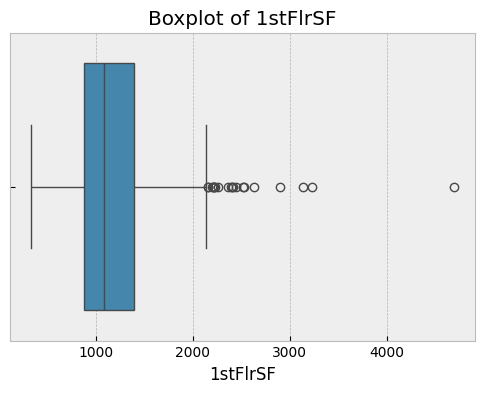

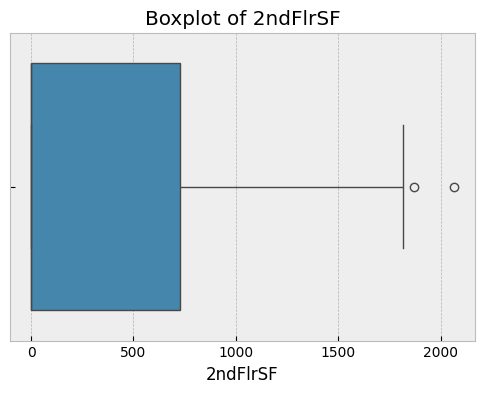

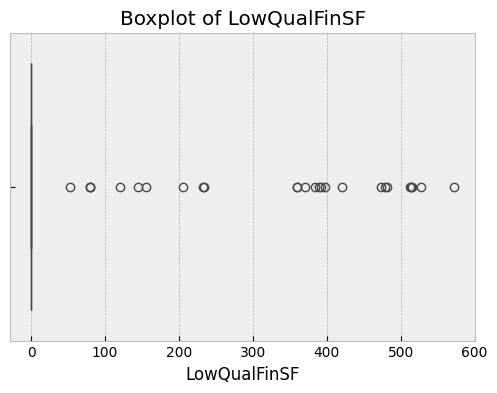

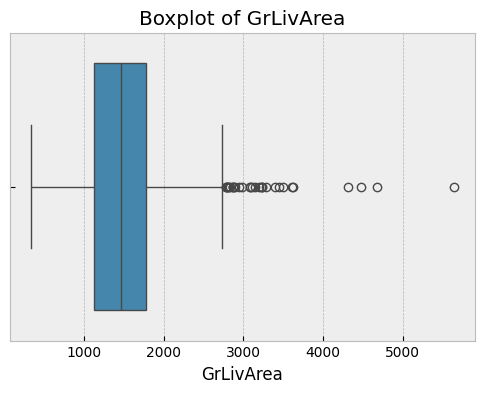

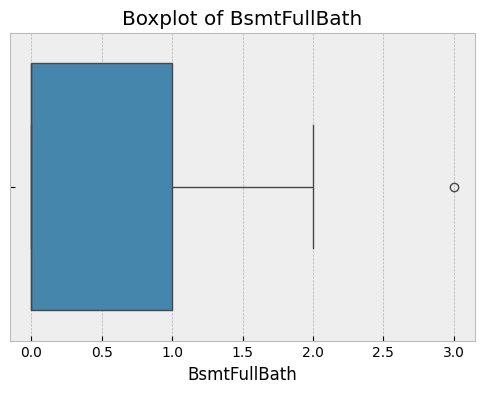

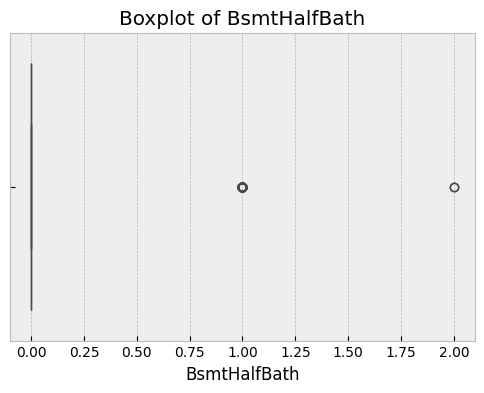

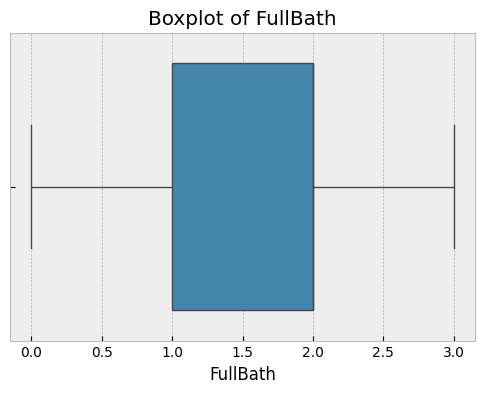

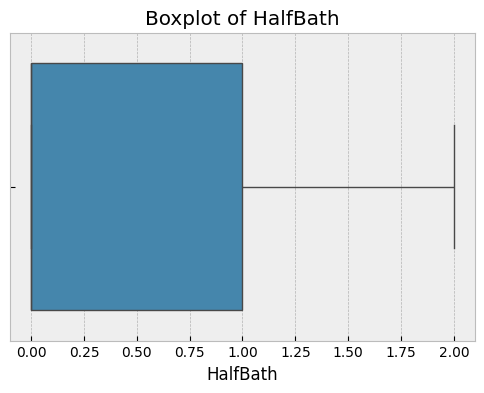

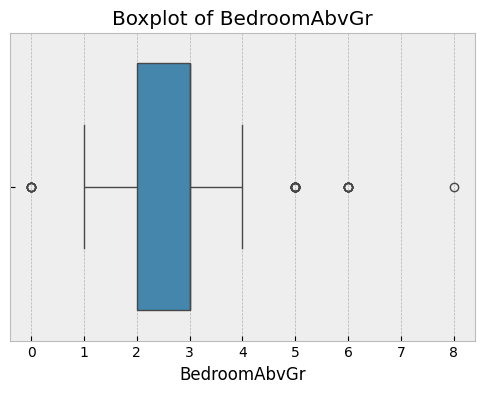

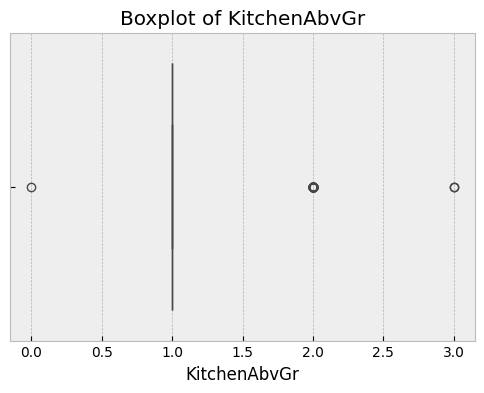

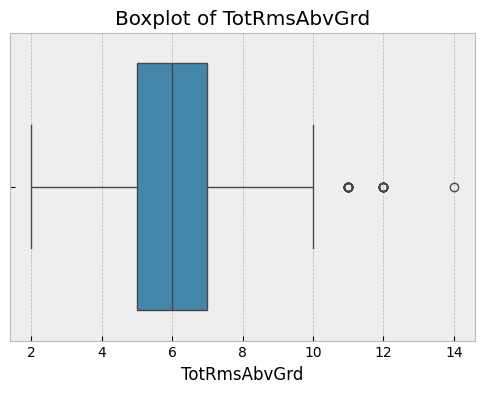

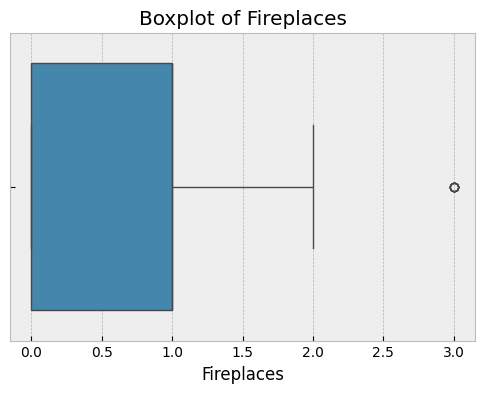

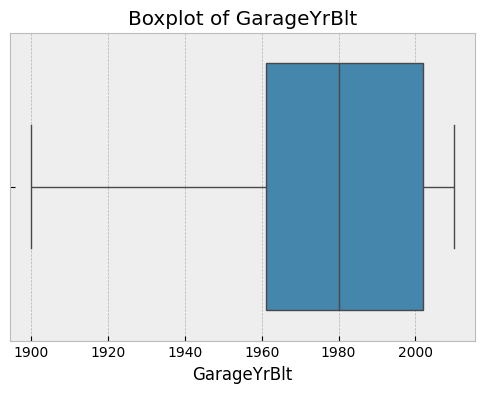

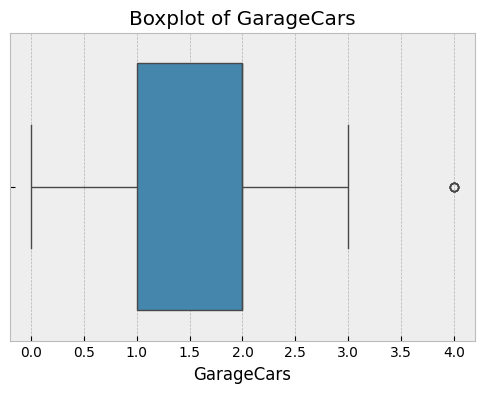

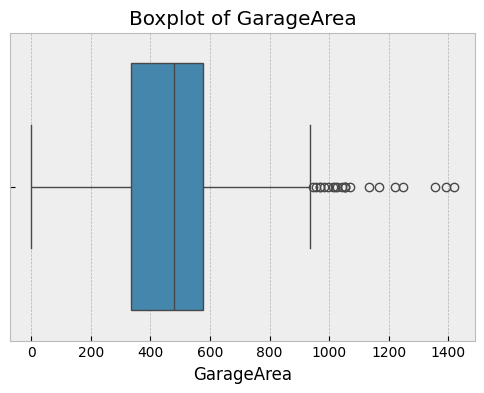

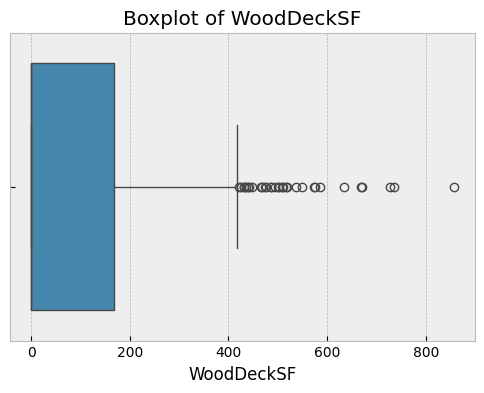

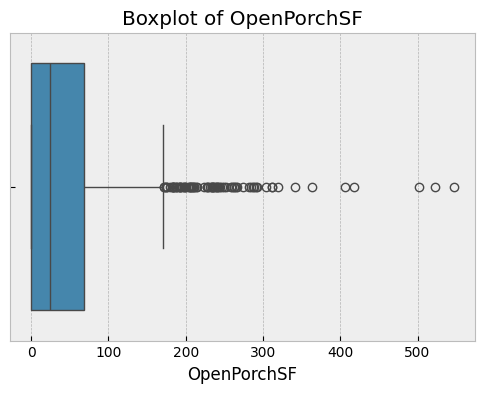

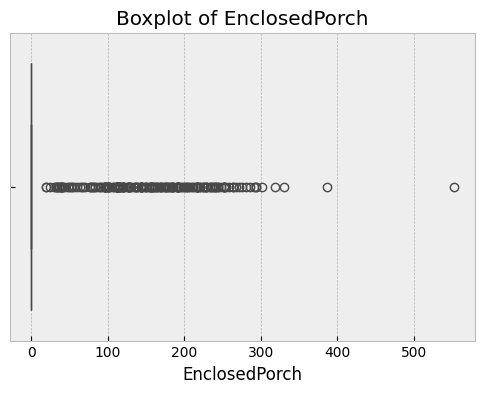

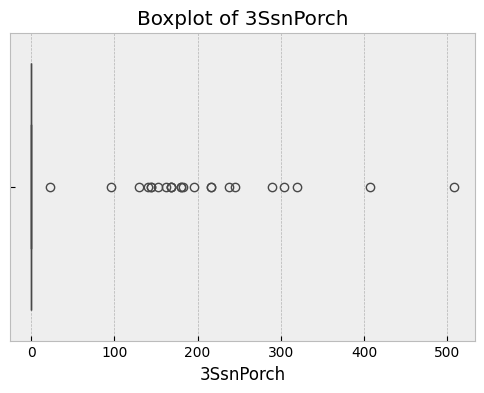

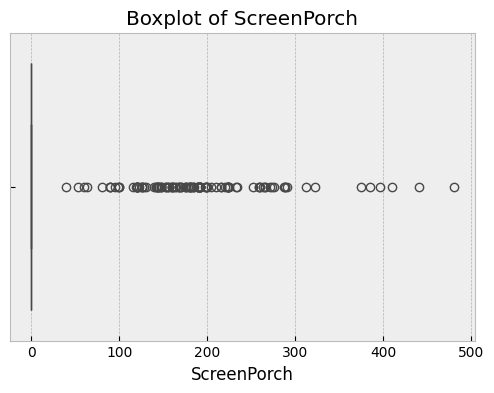

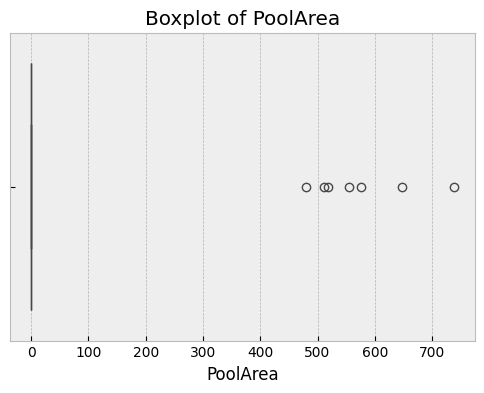

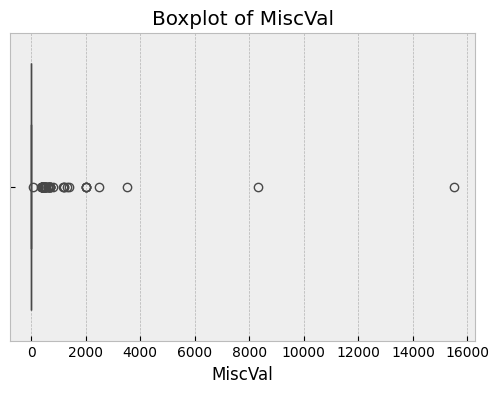

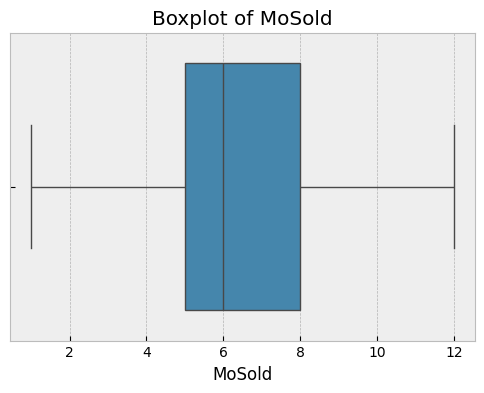

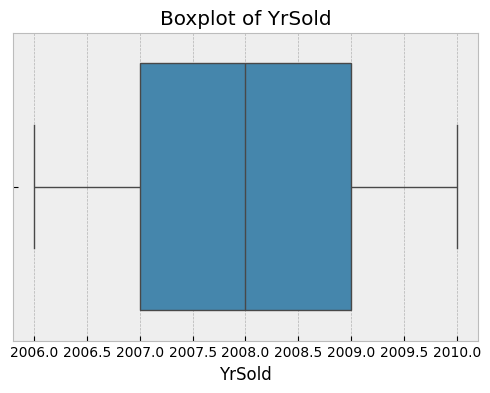

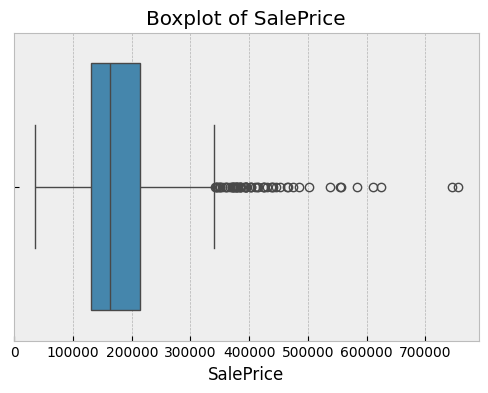

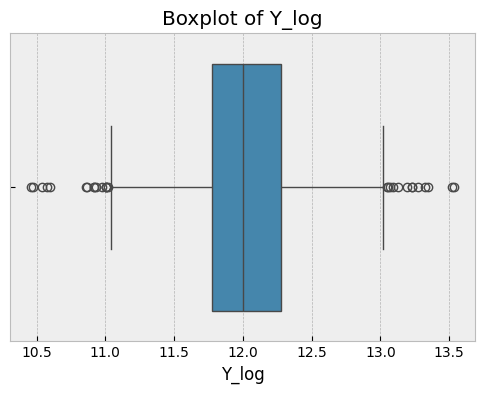

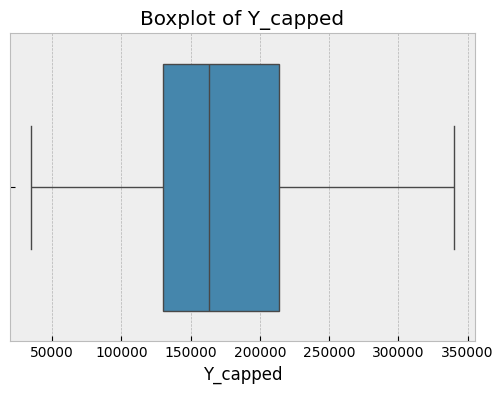

In [ ]:
import seaborn as sns

for col in s.select_dtypes(include='number').columns:  # Loop through numeric columns
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=s[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [ ]:
outlier_columns = []
for col in s.select_dtypes(include='number').columns:
    Q1 = s[col].quantile(0.25)
    Q3 = s[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = s[(s[col] < lower_bound) | (s[col] > upper_bound)]

    if not outliers.empty:
        outlier_columns.append(col)

print("Columns with outliers:", outlier_columns)


Columns with outliers: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'Y_log']


<Axes: xlabel='SalePrice', ylabel='Density'>

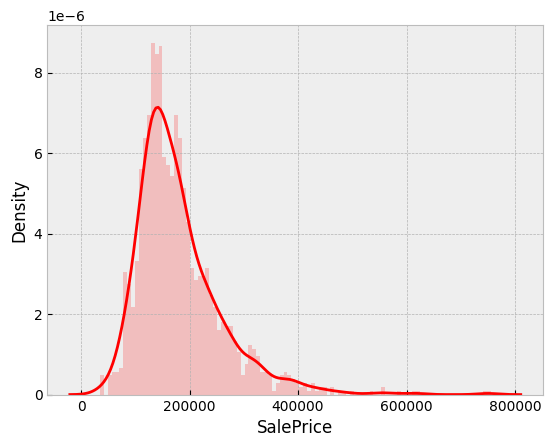

In [ ]:
#data are normally distributed or not
sns.distplot(s['SalePrice'],color='r',bins=100,hist_kws={'alpha':0.2})

Scatterplot

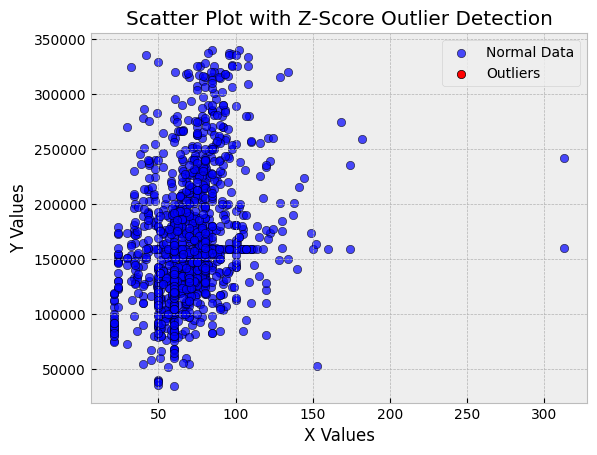

0
1460


In [ ]:

#When to Use a Scatter Plot?
#To visualize the relationship between two numerical variables.
#To identify patterns (e.g., linear, non-linear).
#To detect correlations (positive, negative, or none).
#To spot outliers in data.
#To check for clusters in datasets.
from scipy import stats

x=s['LotFrontage']
y=s['SalePrice']
# Compute Z-scores for Y values
z_scores = np.abs(stats.zscore(y))

# Identify outlier indices (Z-score > 3)
outlier_indices = np.where(z_scores > 3)[0]



# Scatter plot (normal points)
plt.scatter(x, y, color='blue', alpha=0.7, edgecolors='black', label="Normal Data")

# Scatter plot (outliers)
plt.scatter(x[outlier_indices], y[outlier_indices], color='red', edgecolors='black', label="Outliers")

# Labels and title
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Scatter Plot with Z-Score Outlier Detection")
plt.legend()
plt.show()

print(len(outlier_indices))
print(s['SalePrice'].count())


handle outlier

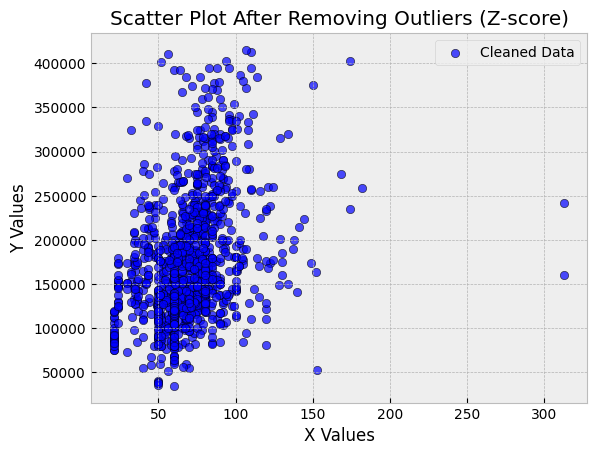

In [ ]:
# Keep only non-outliers (Z-score < 3)
df_cleaned = s[z_scores < 3]

# Scatter plot after removing outliers
# Use the original column names instead of 'x' and 'y'
plt.scatter(df_cleaned['LotFrontage'], df_cleaned['SalePrice'], color='blue', alpha=0.7, edgecolors='black', label="Cleaned Data")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Scatter Plot After Removing Outliers (Z-score)")
plt.legend()
plt.show()

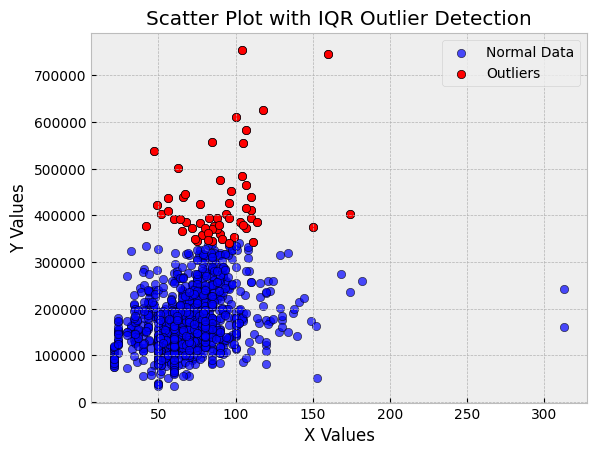

61
1460


In [ ]:
Q1 = np.percentile(y, 25)
Q3 = np.percentile(y, 75)
IQR = Q3 - Q1

# Define outlier limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outlier_indices = np.where((y < lower_bound) | (y > upper_bound))[0]

# Scatter plot (normal points)
plt.scatter(x, y, color='blue', alpha=0.7, edgecolors='black', label="Normal Data")

# Scatter plot (outliers)
plt.scatter(x[outlier_indices], y[outlier_indices], color='red', edgecolors='black', label="Outliers")

# Labels and title
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Scatter Plot with IQR Outlier Detection")
plt.legend()
plt.show()
print(len(outlier_indices))
print(s['SalePrice'].count())

handle outlier

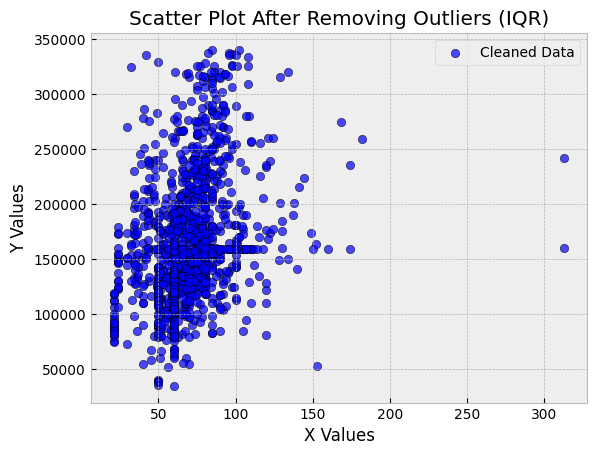

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64


In [ ]:
# Keep only non-outliers
df_cleaned = s[(s['SalePrice'] >= lower_bound) & (s['SalePrice'] <= upper_bound)]

# Scatter plot after removing outliers
plt.scatter(df_cleaned['LotFrontage'], df_cleaned['SalePrice'], color='blue', alpha=0.7, edgecolors='black', label="Cleaned Data")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Scatter Plot After Removing Outliers (IQR)")
plt.legend()
plt.show()


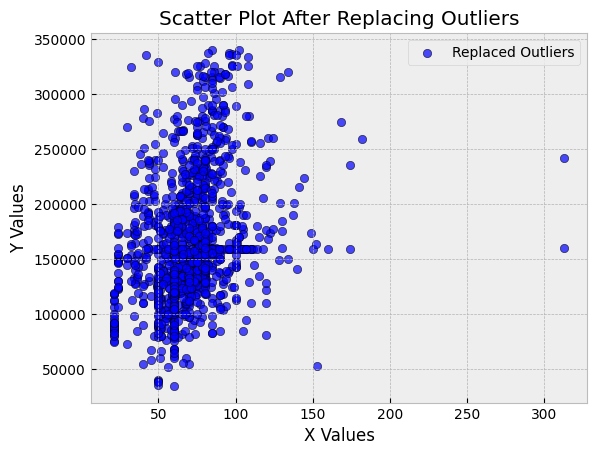

In [ ]:
#Replace Outliers with Median or Mean

# Compute median of non-outliers
median_value = s[(s['SalePrice'] >= lower_bound) & (s['SalePrice'] <= upper_bound)]['SalePrice'].median()

# Replace outliers with median
s['SalePrice'] = np.where((s['SalePrice'] < lower_bound) | (s['SalePrice'] > upper_bound), median_value, s['SalePrice'])

# Scatter plot after replacing outliers
plt.scatter(df['LotFrontage'], s['SalePrice'], color='blue', alpha=0.7, edgecolors='black', label="Replaced Outliers")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Scatter Plot After Replacing Outliers")
plt.legend()
plt.show()


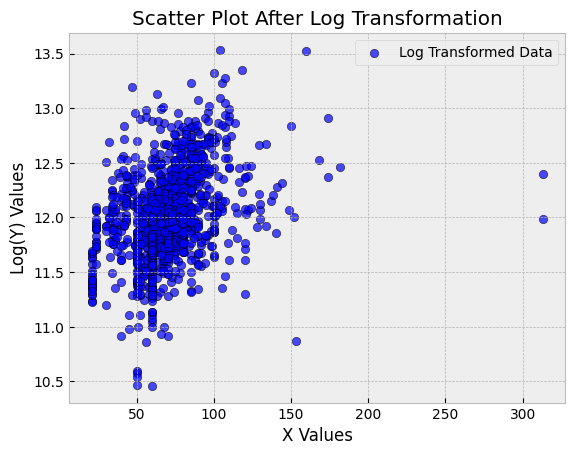

In [ ]:
# Apply log transformation
s['Y_log'] = np.log(s['SalePrice'] + 1)  # Adding 1 to avoid log(0)

# Scatter plot after transformation
plt.scatter(s['LotFrontage'], s['Y_log'], color='blue', alpha=0.7, edgecolors='black', label="Log Transformed Data")
plt.xlabel("X Values")
plt.ylabel("Log(Y) Values")
plt.title("Scatter Plot After Log Transformation")
plt.legend()
plt.show()

1️⃣ Capping Using IQR (Interquartile Range)

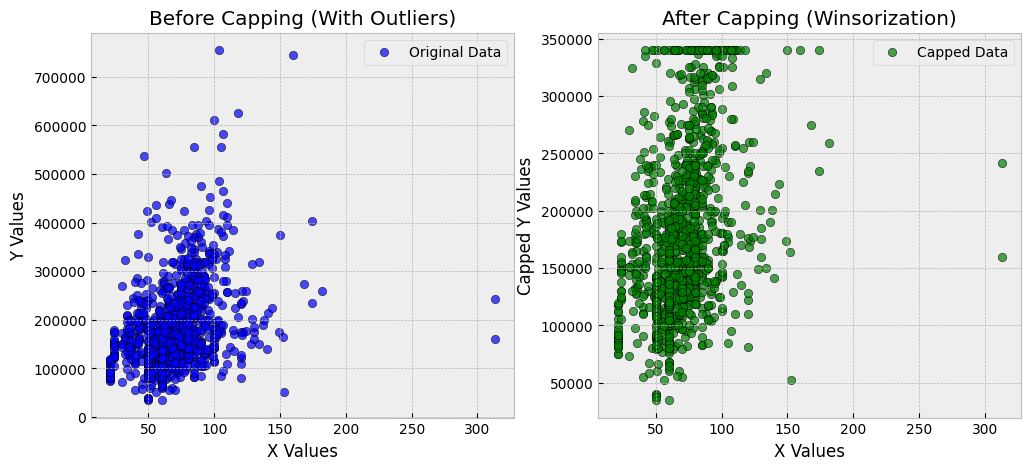

In [ ]:
# Compute IQR
Q1 = s['SalePrice'].quantile(0.25)
Q3 = s['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# Define capping bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply capping (Winsorization)
s['Y_capped'] = np.where(s['SalePrice'] < lower_bound, lower_bound,
                          np.where(s['SalePrice'] > upper_bound, upper_bound, s['SalePrice']))

# Scatter plot before and after capping
plt.figure(figsize=(12, 5))

# Original Data
plt.subplot(1, 2, 1)
plt.scatter(s['LotFrontage'], s['SalePrice'], color='blue', alpha=0.7, edgecolors='black', label="Original Data")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Before Capping (With Outliers)")
plt.legend()

# Capped Data
plt.subplot(1, 2, 2)
plt.scatter(s['LotFrontage'], s['Y_capped'], color='green', alpha=0.7, edgecolors='black', label="Capped Data")
plt.xlabel("X Values")
plt.ylabel("Capped Y Values")
plt.title("After Capping (Winsorization)")
plt.legend()

plt.show()

remove outlier all similar datatype column

In [ ]:
def remove_outliers(s):
    for col in s.select_dtypes(include='number').columns:
        Q1 = s[col].quantile(0.25)
        Q3 = s[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Keep only values within the IQR range
        s = s[(s[col] >= lower_bound) & (s[col] <= upper_bound)]

    return s

s = remove_outliers(s)


Caping outlier all similar datatype column

In [ ]:
def cap_outliers(s):
    for col in s.select_dtypes(include='number').columns:
        Q1 = s[col].quantile(0.25)
        Q3 = s[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        s[col] = s[col].clip(lower_bound, upper_bound)  # Capping outliers
    return df

s = cap_outliers(s)

# syntex of value counts
Series.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)
1.if "normalize=True". This returns the percentage of each category instead of absolute counts.

Use Cases of value_counts()
✅ Checking class imbalance in machine learning datasets
✅ Understanding categorical distributions
✅ Finding missing values (if dropna=False)
✅ Grouping numerical data into bins


In [ ]:
s['MSSubClass'].value_counts()

# **Check the Data are normally distributed or not**

In [ ]:
print(s['SalePrice'].describe())
plt.figure(figsize=(10,5))
sns.distplot(s['SalePrice'],color='r',bins=100,hist_kws={'alpha':0.2}) #This sets the transparency (alpha) of the histogram bars.It ranges between 0 and 1:

# If  you want to catch the numarical data from you datasets do this

In [ ]:
s_num = s.select_dtypes(include=['float64','int64'])
s_num.head()

# ***histogram***
## Check Data are normal or skewed

In [ ]:
s_num.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8,edgecolor='black',color='r')

In [ ]:
# Creating a histogram with Seaborn
sns.histplot(s_num['SalePrice'], bins=100, kde=True, color='red')

#Check correlation

In [ ]:
s_num_corr = s_num.corr()['SalePrice'].sort_values(ascending=False)
s_num_corr

                                                                       Day-2

# Creating a Correlation Heatmap

In [ ]:
s_corr=s_num.drop('SalePrice',axis=1).corr()
plt.figure(figsize=(10,10))

sns.heatmap(s_corr[(s_corr>=5) | (s_corr<=-4)],cmap='viridis',vmax=1.0,vmin=-1.0,linewidth=0.1,annot=True,annot_kws={'size':8},square=True)

plt.title("Correlation Heatmap")
plt.show()